# **Applying the outer evaluation**

## **Estimation of future performance**

In [621]:
final_pipeline.fit(X=X_HAR_train, y=Y_train)
Y_test_hat = final_pipeline.predict(X=X_HAR_test)
future_bal_acc = np.round(balanced_accuracy_score(y_pred=Y_test_hat, y_true=Y_test), 2)
future_acc = np.round(accuracy_score(y_pred=Y_test_hat, y_true=Y_test), 2)
print(f'The estimation of future performance of the best pipeline is:\n - In terms of balanced accuracy: {future_bal_acc}\n - In terms of accuracy: {future_acc}')

The estimation of future performance of the best pipeline is:
 - In terms of balanced accuracy: 0.97
 - In terms of accuracy: 0.99


### **Confusion Matrix**

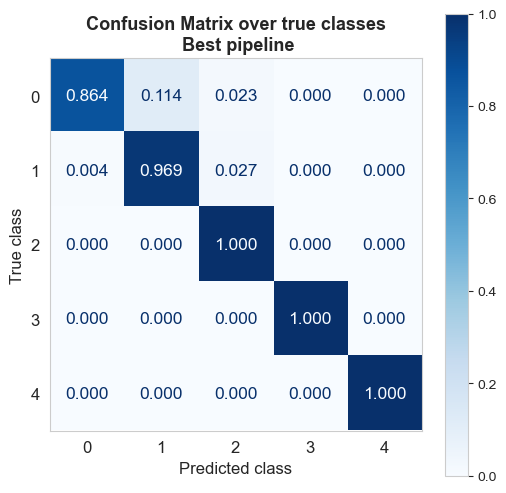

In [622]:
cm = confusion_matrix(y_pred=Y_test_hat, y_true=Y_test, normalize='true', labels=final_pipeline.classes_)
# normalize='true' to normalize over the rows (true classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_pipeline.classes_)

fig, axs = plt.subplots(figsize=(6,6))
disp.plot(ax=axs, cmap=plt.cm.Blues, values_format='.3f', text_kw={'fontsize': 12.5})
plt.title('Confusion Matrix over true classes\n Best pipeline', weight='bold', fontsize=13)
axs.set_xlabel('Predicted class', size=12)
axs.set_ylabel('True class', size=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

Remembering the meaning of the class labels, after applying label encoding: 0: Running, 1: Walking, 2: Standing, 3: Sitting, 4: Lying.


The performance of the best pipeline recognizing human activity is outstanding, specially in the walking, standing, sitting and lying activities.

The only activity in which the pipeline performs a bit worse is running, since the model misrecognize it as walking the 11.4 % of the times.

## **Saving the final pipeline**

We save the final (best) pipeline as a pre-training model after training it with all the available data.

In [623]:
final_pipeline.fit(X=X_HAR, y=Y)

# Save the pipeline to a file
with open(r'C:\Users\fscielzo\Documents\DataScience-GitHub\Human-Activity-Recognition\results\final_pipeline.pkl', 'wb') as file:
    pickle.dump(final_pipeline, file)